# Benchmarking Experiments for Extended KPrototypes

In [1]:
import os
import sys
current_dir = os.getcwd()

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

from random import randint
from typing import Any

import pandas as pd

from benchmark_extension import Experiment

In [2]:
sample_difficulty_configurations = {
     'easy': {
             'n_samples': 2000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(3, 3, 3),  # How many vocab items
                                     (3, 3, 3),  # are associated to a
                                     (3, 3, 3),  # cluster.
                                     (3, 3, 3),
                                     (3, 3, 3)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 1,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               },
              },
     'medium': None,
     'hard': None
}

In [3]:
exp = Experiment(benchmarking_config=sample_difficulty_configurations['easy'],
                 approaches=('naive', 'one-hot', 'one-hot-pca', 'extended'),
                 random_state=42)

In [4]:
single_result = exp.run_experiment()

In [5]:
single_result['naive']

{'preprocess_time': 0.009260700084269047,
 'clustering_time': 4.436648300033994,
 'sum_of_times': 4.445909000118263,
 'n_iter': 2,
 'MIS': 0.9698692316348873,
 'ARI': 0.9850825134727914,
 'Silhoutte Index': 0.4728563265184326,
 'centroids': array([['-3.02685837513088', '-3.060411520334348', '2.9566655341127697',
         '2.9991287007613856', '-3.016087121799718', '5', '4', '5', '4',
         '5', '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}',
         '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}'],
        ['2.9457840200839347', '3.0208802544753506', '2.9393406917607727',
         '-2.932237858513235', '2.9183526188934112', '3', '2', '2', '2',
         '3', '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}',
         '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}'],
        ['3.0162932828337894', '-2.965921465036472', '2.9648799685851572',
         '2.9845101246319605', '2.971865234885406', '0', '1', '0', '0',
         '0', '{0, 1, 2, 9, 10}', '{0, 1, 2, 9, 10}', '{0, 1, 2, 

In [6]:
single_result['one-hot']

{'preprocess_time': 0.824871200020425,
 'clustering_time': 7.41347929998301,
 'sum_of_times': 8.238350500003435,
 'n_iter': 2,
 'MIS': 0.9792480118880699,
 'ARI': 0.9895642142025028,
 'Silhoutte Index': 0.5742200797638486,
 'centroids': array([[ 3.01375172e+00, -2.95615795e+00,  2.96331270e+00,
          2.97647566e+00,  2.97115367e+00,  5.05295008e-01,
          5.23449319e-01,  4.99243570e-01,  4.78063540e-01,
          4.97730711e-01,  9.93948563e-01,  9.93948563e-01,
          9.93948563e-01,  6.05143722e-03,  6.05143722e-03,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  

In [7]:
single_result['one-hot-pca']

{'preprocess_time': 0.938326200004667,
 'clustering_time': 3.590787199907936,
 'sum_of_times': 4.529113399912603,
 'n_iter': 2,
 'MIS': 0.9724181956910335,
 'ARI': 0.9865824602432615,
 'Silhoutte Index': 0.6420686103285879,
 'centroids': array([[-3.02475416e+00, -3.05350012e+00,  2.95928398e+00,
          2.99580409e+00, -3.00977783e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.47275405e-03,
          1.47275405e-03,  3.49060315e+00, -5.14570414e-01,
         -6.52642410e-17, -1.68834831e-17, -3.25345687e-30,
          4.24042258e-30, -3.43164990e-32,  4.01839100e-33,
          8.51760017e-34, -8.70534224e-45, -2.36892119e-45,
         -1.53032641e-46, -5.00710093e-47, -8.33680726e-50,
          5.00000000e+00,  4.00000000e+00,  5.00000000e+00,
          4.00000000e+00,  5.00000000e+00],
        [ 3.01629328e+00, -2.96592147e+00,  2.96487997e+00,
          2.98451012e+00,  2.97186523e+00,  9.92435703e-01,
          9.92435703e-01,  9.92435703e-01,  6.05143722e-03,

In [8]:
single_result['extended']

{'preprocess_time': 0.00012750003952533007,
 'clustering_time': 13.170104200020432,
 'sum_of_times': 13.170231700059958,
 'n_iter': 3,
 'MIS': 0.9698692316348873,
 'ARI': 0.9850825134727914,
 'Silhoutte Index': 0.6820667965147432,
 'centroids': array([[3.0162932828337907, -2.9659214650364714, 2.964879968585157,
         2.9845101246319605, 2.9718652348854064, 0, 1, 0, 0, 0,
         {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
         {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}],
        [-3.0268583751308826, -3.0604115203343354, 2.95666553411276,
         2.999128700761384, -3.0160871217997176, 5, 4, 5, 4, 5,
         {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
         {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
        [2.9457840200839334, 3.020880254475352, 2.9393406917607776,
         -2.932237858513238, 2.9183526188934117, 3, 2, 2, 2, 3,
         {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
         {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}]], dtype=object)}

Note that the centroid values for the multi-valued attributes perfectly reflect the centroids at the data generation step: 3 values for the argument vocab_lens and two extra arguments, one per intersection with another cluster.

## Experiment 1: Changing the values of Theta

Let us try $\theta \in \{0.001, 0.005, 0.01, 0.05\}$ for now.

In [9]:
# random_states = [randint(0, 100) for x in range(4)]

random_states = [34, 9, 7, 92]

In [57]:
exp = Experiment(benchmarking_config=sample_difficulty_configurations['easy'],
                 approaches=('extended',))

In [58]:
result_list = exp.experiment_across_values(
    base_config=sample_difficulty_configurations['easy'],
    random_states=random_states,
    approach_settings= [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ])

In [59]:
result_list[0]

{'extended': {'preprocess_time': 0.0001308999489992857,
  'clustering_time': 13.996221699984744,
  'sum_of_times': 13.996352599933743,
  'n_iter': 3,
  'MIS': 0.9022742464960722,
  'ARI': 0.9408890921287254,
  'centroids': array([[-3.0296844430147423, -2.986342763758682, 2.917696317335106,
          3.0168621941000104, 3.0191491641940704, 4, 4, 4, 4, 5,
          {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
          {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
         [3.0065910143126215, 2.9435042123424324, 3.1179467529071108,
          3.0104278831823588, 2.9391349732405985, 1, 1, 1, 0, 0,
          {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
          {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}],
         [2.998802202159401, -2.962544057748266, 3.0272171718269822,
          3.060815261060462, 2.931489218918325, 3, 2, 3, 3, 2,
          {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
          {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}]], dtype=object)}}

In [60]:
def organise_results_for_one_variable(
        result_list: list[dict[str, dict]],
        variable_vals: list,
        targets: list[str]):
    # Approaches as rows, targets as columns
    series_list = []

    for result in result_list:
        result_indexes = []
        result_outcomes = []

        for r_key in targets:
            for a_key, a_result in result.items():
                outcome = a_result[r_key]
                result_outcomes.append(outcome)
                result_indexes.append((r_key, a_key))
        
        index = pd.MultiIndex.from_tuples(result_indexes,
                                          names=['metric',
                                                 'approach'])
        series_list.append(pd.Series(result_outcomes, index))

    out_df = pd.concat(series_list, axis=1)
    out_df.columns = variable_vals

    return out_df

In [61]:
organise_results_for_one_variable(result_list=result_list,
                                  variable_vals=[0.001, 0.005, 0.01, 0.05],
                                  targets=['MIS', 'ARI']
                                  )

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.902274,0.954131,0.958092,0.957945
ARI,extended,0.940889,0.976088,0.979085,0.977569


Interesting; both metrics grow in the levels above 0.001, and both plateau at the 0.01 level of the parameter. Let us run the experiment many times now:

In [62]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ]

In [63]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(4)]
    
    exp = Experiment(
        benchmarking_config=sample_difficulty_configurations['easy'],
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=sample_difficulty_configurations['easy'],
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [70]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.945743,0.952104,0.950758,0.925301
ARI,extended,0.969961,0.973742,0.972485,0.954777


It would seem that low and prudential values of theta offer the best performance in truth recovery. When we look to the clusters...

In [71]:
# See benchmark_results/theta_experiment_results_centroids.txt
exp_raw_results

[[{'extended': {'preprocess_time': 0.00017829996068030596,
    'clustering_time': 12.753157900064252,
    'sum_of_times': 12.753336200024933,
    'n_iter': 3,
    'MIS': 0.9709819668795838,
    'ARI': 0.9849985677305998,
    'centroids': array([[3.0447802373182706, -3.0069939281707305, -3.0195703818096025,
            -2.9968568704713765, -2.991774057213998, 2, 3, 2, 3, 3,
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}],
           [2.975741589834072, -3.0483469450337792, 3.0350426091287757,
            3.036022814937652, 3.0261778842771876, 5, 5, 5, 4, 4,
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
           [-2.9771624323423933, 3.0026196136253245, 2.975555887395916,
            -3.050055461089015, 2.978939601315464, 0, 0, 0, 0, 0,
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}]

...we see that the centroid values for multi-valued attributes are unchanging for the tested values of theta. This is understandable, since the clusters were generated with highly differentiated multi-valued attributes.

We can test higher vocabulary lengths and degrees of intersection to measure a stronger effect:

In [95]:
base_config = {
             'n_samples': 2000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(10, 10, 10),  # How many vocab items
                                     (10, 10, 10),  # are associated to a
                                     (10, 10, 10),  # cluster.
                                     (10, 10, 10),
                                     (10, 10, 10)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 5,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               }
              }

In [96]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ]

In [97]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(4)]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [98]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.941083,0.946023,0.954386,0.948686
ARI,extended,0.966999,0.969985,0.976446,0.972271


Similar results. Let us add higher values of theta as well:

In [99]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.1}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.25}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.5}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.7}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.9}
                        }
                        ]

In [100]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(9)]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.7, 0.9],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [103]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050,0.100,0.250,0.500,0.700,0.900
metric,approach,,,,,,,,,
MIS,extended,0.958383,0.943064,0.965756,0.962285,0.939449,0.93779,0.945055,0.956612,0.953027
ARI,extended,0.977662,0.969106,0.982411,0.980611,0.966976,0.96153,0.969934,0.977914,0.974126


In [107]:
(sum_of_values/iterations).round(3).to_clipboard()

In [84]:
exp_raw_results

[[{'extended': {'preprocess_time': 0.000112400040961802,
    'clustering_time': 13.29801819997374,
    'sum_of_times': 13.298130600014701,
    'n_iter': 4,
    'MIS': 0.9536371199653346,
    'ARI': 0.9761404319107873,
    'centroids': array([[-3.117597659721187, 3.061273714440856, 3.117611073803519,
            2.9447247440878357, 2.894470235247624, 3, 3, 2, 3, 2,
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}],
           [-2.922690732443881, 3.004825316922242, -2.9859891617296657,
            2.9584974131314072, 3.0453544136659016, 4, 5, 5, 4, 5,
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
           [2.9777953894908515, -2.938556598419878, 3.0111099446101917,
            -3.065100896326692, -2.9388027603175226, 1, 0, 0, 1, 0,
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}]], dty

We observe that with a growing theta, the centroid sets tend to become emptier, increasing the distances. However, since the numeric and categorical attributes contain enough separability between them, the clustering result is not substantially affected.

## Experiment 2: Variations on the Values of the Gammas

In [2]:
from itertools import product

In [3]:
base_config = {
             'n_samples': 1000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(3, 3, 3),  # How many vocab items
                                     (3, 3, 3),  # are associated to a
                                     (3, 3, 3),  # cluster.
                                     (3, 3, 3),
                                     (3, 3, 3)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 1,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               },
              }

In [4]:
def organise_results_for_one_variable(
        result_list: list[dict[str, dict]],
        variable_vals: list,
        targets: list[str]):
    # Approaches as rows, targets as columns
    series_list = []

    for result in result_list:
        result_indexes = []
        result_outcomes = []

        for r_key in targets:
            for a_key, a_result in result.items():
                outcome = a_result[r_key]
                result_outcomes.append(outcome)
                result_indexes.append((r_key, a_key))
        
        index = pd.MultiIndex.from_tuples(result_indexes,
                                          names=['metric',
                                                 'approach'])
        series_list.append(pd.Series(result_outcomes, index))

    out_df = pd.concat(series_list, axis=1)
    out_df.columns = variable_vals

    return out_df

In [5]:
base_setting = {'naive': {'gamma': None},
                'one-hot': {'gamma': None, 'max_dummies': 100},
                'one-hot-pca': {'gamma': None,
                                'reduced_dimensions': 0.25},
                'extended': {'gamma_c': 0.1, 'gamma_m': 0.1,
                             'theta': 0.005}
                        }

In [6]:
import copy

def grid_test_across_gammas(gamma_list: list, base_approach_setting: dict):
    out_settings = []
    out_combs = []
    gamma_combinations = product(gamma_list, repeat=2)
    setting = base_approach_setting.copy()

    for comb in gamma_combinations:
        if comb[0]+comb[1] >= 1.0:
            continue
        setting['extended']['gamma_c'] = comb[0]
        setting['extended']['gamma_m'] = comb[1]
        out_settings.append(copy.deepcopy(setting))
        out_combs.append(comb)

    return out_settings, out_combs

In [7]:
setting_list, setting_combinations = grid_test_across_gammas(gamma_list=[0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 1.],
                                       base_approach_setting=base_setting)

setting_list[:2]

[{'naive': {'gamma': None},
  'one-hot': {'gamma': None, 'max_dummies': 100},
  'one-hot-pca': {'gamma': None, 'reduced_dimensions': 0.25},
  'extended': {'gamma_c': 0.1, 'gamma_m': 0.1, 'theta': 0.005}},
 {'naive': {'gamma': None},
  'one-hot': {'gamma': None, 'max_dummies': 100},
  'one-hot-pca': {'gamma': None, 'reduced_dimensions': 0.25},
  'extended': {'gamma_c': 0.1, 'gamma_m': 0.2, 'theta': 0.005}}]

### Experiment with Simulated Data

In [8]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(len(setting_combinations))]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=setting_list)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[str(comb) for comb in setting_combinations],
        targets=['MIS', 'ARI', 'Silhouette Index']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [9]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,"(0.1, 0.1)","(0.1, 0.2)","(0.1, 0.3)","(0.1, 0.4)","(0.1, 0.5)","(0.1, 0.6)","(0.1, 0.7)","(0.1, 0.8)","(0.2, 0.1)","(0.2, 0.2)",...,"(0.5, 0.1)","(0.5, 0.2)","(0.5, 0.3)","(0.5, 0.4)","(0.6, 0.1)","(0.6, 0.2)","(0.6, 0.3)","(0.7, 0.1)","(0.7, 0.2)","(0.8, 0.1)"
metric,approach,,,,,,,,,,,,,,,,,,,,,
MIS,extended,0.950498,0.964135,0.932194,0.933516,0.958786,0.957435,0.956567,0.956884,0.947872,0.961929,...,0.952141,0.954380,0.961173,0.966167,0.938427,0.959990,0.972327,0.961541,0.964591,0.960374
ARI,extended,0.973143,0.980952,0.959708,0.960790,0.977985,0.976152,0.977326,0.976760,0.971336,0.979668,...,0.972667,0.974959,0.979667,0.982051,0.965546,0.978466,0.985660,0.979078,0.981491,0.979072
Silhouette Index,extended,0.605004,0.645298,0.632899,0.657300,0.725554,0.772060,0.826453,0.884779,0.582248,0.633809,...,0.530945,0.623977,0.679219,0.755521,0.500689,0.618393,0.675895,0.499382,0.579623,0.429235


In [10]:
import pickle as pkl

with open('experiment_2_results.pkl', 'wb') as file:
    pkl.dump(obj=sum_of_values/iterations, file=file)

In [11]:
import pickle as pkl

with open('experiment_2_results.pkl', 'rb') as file:
    res = pkl.load(file)

In [12]:
res

,,"(0.1, 0.1)","(0.1, 0.2)","(0.1, 0.3)","(0.1, 0.4)","(0.1, 0.5)","(0.1, 0.6)","(0.1, 0.7)","(0.1, 0.8)","(0.2, 0.1)","(0.2, 0.2)",...,"(0.5, 0.1)","(0.5, 0.2)","(0.5, 0.3)","(0.5, 0.4)","(0.6, 0.1)","(0.6, 0.2)","(0.6, 0.3)","(0.7, 0.1)","(0.7, 0.2)","(0.8, 0.1)"
metric,approach,,,,,,,,,,,,,,,,,,,,,
MIS,extended,0.950498,0.964135,0.932194,0.933516,0.958786,0.957435,0.956567,0.956884,0.947872,0.961929,...,0.952141,0.954380,0.961173,0.966167,0.938427,0.959990,0.972327,0.961541,0.964591,0.960374
ARI,extended,0.973143,0.980952,0.959708,0.960790,0.977985,0.976152,0.977326,0.976760,0.971336,0.979668,...,0.972667,0.974959,0.979667,0.982051,0.965546,0.978466,0.985660,0.979078,0.981491,0.979072
Silhouette Index,extended,0.605004,0.645298,0.632899,0.657300,0.725554,0.772060,0.826453,0.884779,0.582248,0.633809,...,0.530945,0.623977,0.679219,0.755521,0.500689,0.618393,0.675895,0.499382,0.579623,0.429235


In [26]:
res.T.head()

metric,MIS,ARI,Silhouette Index
approach,extended,extended,extended
"(0.1, 0.1)",0.950498,0.973143,0.605004
"(0.1, 0.2)",0.964135,0.980952,0.645298
"(0.1, 0.3)",0.932194,0.959708,0.632899
"(0.1, 0.4)",0.933516,0.960790,0.657300
"(0.1, 0.5)",0.958786,0.977985,0.725554


In [14]:
heat_map_res = res.reset_index(drop=True).T

In [15]:
heat_map_res.columns = ['MIS', 'ARI', 'Silhouette Index']
heat_map_res.head()

,MIS,ARI,Silhouette Index
"(0.1, 0.1)",0.950498,0.973143,0.605004
"(0.1, 0.2)",0.964135,0.980952,0.645298
"(0.1, 0.3)",0.932194,0.959708,0.632899
"(0.1, 0.4)",0.933516,0.960790,0.657300
"(0.1, 0.5)",0.958786,0.977985,0.725554


In [16]:
from seaborn import heatmap

In [17]:
def interpret_string_tuple(string_tuple: str):
    out = string_tuple.replace('(', '').replace(')', '')
    out = [float(i) for i in out.split(', ')]
    return out

interpret_string_tuple('(0.1, 0.2)')

[0.1, 0.2]

In [18]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['MIS'].reset_index(drop=True)], axis=1)
heatmap_df.head()

,gamma_c,gamma_m,MIS
0,0.1,0.1,0.950498
1,0.1,0.2,0.964135
2,0.1,0.3,0.932194
3,0.1,0.4,0.933516
4,0.1,0.5,0.958786


<Axes: xlabel='gamma_m', ylabel='gamma_c'>

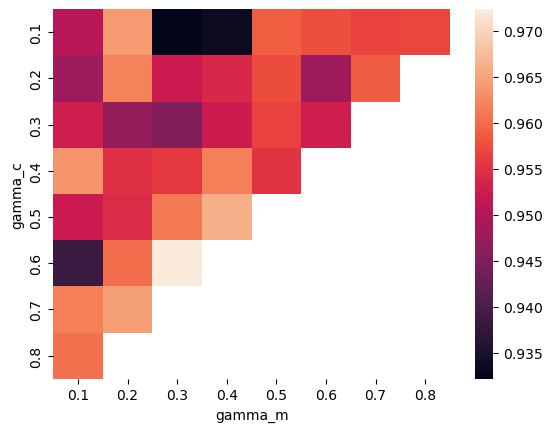

In [19]:
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='MIS'))

<Axes: xlabel='gamma_m', ylabel='gamma_c'>

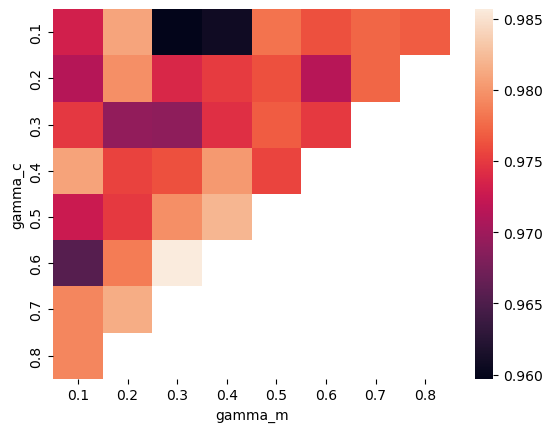

In [20]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['ARI'].reset_index(drop=True)], axis=1)
heatmap_df.head()
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='ARI'))

<Axes: xlabel='gamma_m', ylabel='gamma_c'>

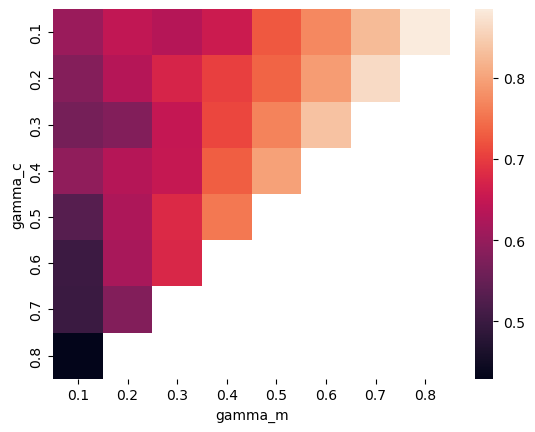

In [21]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['Silhouette Index'].reset_index(drop=True)], axis=1)
heatmap_df.head()
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='Silhouette Index'))

Recall that in the testing initialization, each categorical variable was given two levels associated with each cluster. Since that means that there is some distance between points within the clusters that are similar in scale to distances to points outside the cluster, giving more importance to such distances will lead to badly-separated partitions.  
  
Note however that such a relationship does not hold for the capacity to recover the ground truth; good performance of the method is observed at all levels of the gammas for the simulated data.

Thus, a separability statistic is conditional on the distance function; some transformations of the attribute space (with the gammas) simply create more easily separable clusters, but if the clusters offer a good natural separation, recovery of such a separation is possible.

### Silhouette across a subsample of the Movies dataset

Let's try the silhouette analysis on a 2000-row subsample of the Movies dataset:

In [8]:
movies_df = pd.read_pickle('movies.pkl').sample(2000)
movies_df.head()

,runtime,vote_average,vote_count,adult,original_language,status,genres,production_companies,production_countries,spoken_languages
index,,,,,,,,,,
9355,0.088446,0.477778,0.002771,0,14,3,"{Drama, Comedy}","{27753, 42158}",{US},{en}
12890,0.078088,0.466667,0.003339,0,44,3,"{Drama, Action, Adventure}","{78093, 16076}",{NO},"{de, no}"
11538,0.137849,0.555556,0.000639,0,14,3,"{Drama, Fantasy}","{73209, 12200, 4056, Canadian Film or Video Pr...","{US, CA, DE}",{en}
8067,0.096414,0.700000,0.014139,0,12,3,"{Drama, History}","{4340, 51075}",{DE},{de}
8893,0.070916,0.477778,0.003055,0,14,3,"{Comedy, Horror}",{30688},{US},{en}


In [9]:
cat_indexes = [3, 4, 5]
multi_indexes = [6, 7, 8, 9]

In [12]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(len(setting_combinations))]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)
    exp.categorical_indexes = cat_indexes
    exp.multival_indexes = multi_indexes

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        given_data=movies_df,
        approach_settings=setting_list)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[str(comb) for comb in setting_combinations],
        targets=['Silhouette Index']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [13]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,"(0.1, 0.1)","(0.1, 0.2)","(0.1, 0.3)","(0.1, 0.4)","(0.1, 0.5)","(0.1, 0.6)","(0.1, 0.7)","(0.1, 0.8)","(0.2, 0.1)","(0.2, 0.2)",...,"(0.5, 0.1)","(0.5, 0.2)","(0.5, 0.3)","(0.5, 0.4)","(0.6, 0.1)","(0.6, 0.2)","(0.6, 0.3)","(0.7, 0.1)","(0.7, 0.2)","(0.8, 0.1)"
metric,approach,,,,,,,,,,,,,,,,,,,,,
Silhouette Index,extended,0.068587,0.128563,0.154784,0.168979,0.177529,0.183282,0.189285,0.191141,0.032295,0.098638,...,-0.255008,0.022291,0.071511,0.096284,-0.287742,-0.158631,0.054002,-0.321134,-0.192293,-0.349669


In [14]:
import pickle as pkl

with open('experiment_2_movies_results.pkl', 'wb') as file:
    pkl.dump(obj=sum_of_values/iterations, file=file)

In [15]:
import pickle as pkl

with open('experiment_2_movies_results.pkl', 'rb') as file:
    res = pkl.load(file)

In [16]:
heat_map_res = res.reset_index(drop=True).T

In [17]:
heat_map_res.columns = ['Silhouette Index']
heat_map_res.head()

,Silhouette Index
"(0.1, 0.1)",0.068587
"(0.1, 0.2)",0.128563
"(0.1, 0.3)",0.154784
"(0.1, 0.4)",0.168979
"(0.1, 0.5)",0.177529


In [18]:
from seaborn import heatmap

In [19]:
def interpret_string_tuple(string_tuple: str):
    out = string_tuple.replace('(', '').replace(')', '')
    out = [float(i) for i in out.split(', ')]
    return out

interpret_string_tuple('(0.1, 0.2)')

[0.1, 0.2]

In [22]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['Silhouette Index'].reset_index(drop=True)], axis=1)
heatmap_df.head()

,gamma_c,gamma_m,Silhouette Index
0,0.1,0.1,0.068587
1,0.1,0.2,0.128563
2,0.1,0.3,0.154784
3,0.1,0.4,0.168979
4,0.1,0.5,0.177529


<Axes: xlabel='gamma_m', ylabel='gamma_c'>

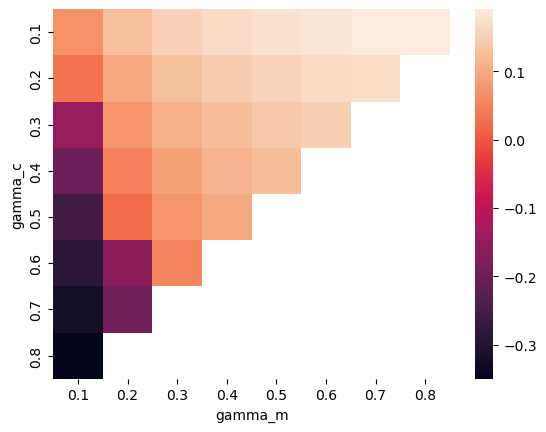

In [23]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['Silhouette Index'].reset_index(drop=True)], axis=1)
heatmap_df.head()
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='Silhouette Index'))

High values of $\gamma _c$ are associated with worse Silhouette indices, and the results favor a high $\gamma _m$ for a three-cluster partition. This my perhaps mean that there is more information to produce a better partition in the multi-valued attributes than there is in the categorical ones. As we can see in the left side of the top row, high $\gamma _n$ produce roughly separable clusters in comparison. There does not seem to be an optimally-separable clustering of the movies dataset, however.

## Experiment 3: Performance across pairs of dataset size and number of clusters

In [2]:
# Configure up here
n_clusters = 2
class_weights = [1/n_clusters for _ in range(n_clusters)]

n_categorical_features = 5
categorical_cardinalities = [2*n_clusters for _ in range(n_categorical_features)]

n_multival_features = 5
multival_vocab_lens = [tuple([3 for _ in range(n_clusters)])
                       for _ in range(n_multival_features)]

In [3]:
base_config = {
             'n_samples': 500,
             'n_clusters': n_clusters,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': categorical_cardinalities,
             'n_multival_features': n_multival_features,
             'multival_vocab_lens': multival_vocab_lens,
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 1,
             'noise': 0.01,
             'class_weights': class_weights,
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               },
              }

In [4]:
def organise_results_for_one_variable(
        result_list: list[dict[str, dict]],
        variable_vals: list,
        targets: list[str]):
    # Approaches as rows, targets as columns
    series_list = []

    for result in result_list:
        result_indexes = []
        result_outcomes = []

        for r_key in targets:
            for a_key, a_result in result.items():
                outcome = a_result[r_key]
                result_outcomes.append(outcome)
                result_indexes.append((r_key, a_key))
        
        index = pd.MultiIndex.from_tuples(result_indexes,
                                          names=['metric',
                                                 'approach'])
        series_list.append(pd.Series(result_outcomes, index))

    out_df = pd.concat(series_list, axis=1)
    out_df.columns = variable_vals

    return out_df

In [5]:
n_list = [500, 1000, 1500, 3000]
k_list = [2, 4, 6, 8]

In [6]:
def grid_test_across_n_and_k(n_list: list[int], k_list: list[int],
                             n_cat: int, n_multi: int):
    out_n = []
    out_k = []
    out_cat_card = []
    out_mval_card = []
    out_class_weights = []
    
    for n_observations in n_list:
        for n_clusters in k_list:
            class_weights = [1/n_clusters for _ in range(n_clusters)]
            categorical_cardinalities = [2*n_clusters for _ in range(n_cat)]
            multival_vocab_lens = [tuple([3 for _ in range(n_clusters)])
                                   for _ in range(n_multi)]
            
            out_n.append(n_observations)
            out_k.append(n_clusters)
            out_cat_card.append(categorical_cardinalities)
            out_mval_card.append(multival_vocab_lens)
            out_class_weights.append(class_weights)

    

    return out_n, out_k, out_cat_card, out_mval_card, out_class_weights

In [7]:
exp_n, exp_k, exp_cat_card, exp_mval_card, exp_class_weights = \
    grid_test_across_n_and_k(n_list=n_list, k_list=k_list,
                             n_cat=n_categorical_features,
                             n_multi=n_multival_features)

In [8]:
setting_combinations = [(exp_n[i], exp_k[i]) for i in range(len(exp_n))]
setting_combinations[:2]

[(500, 2), (500, 4)]

### Experiment with Simulated Data

In [10]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(len(setting_combinations))]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('naive', 'one-hot', 'one-hot-pca', 'extended'),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        n_samples=exp_n,
        n_clusters=exp_k,
        categorical_cardinalities=exp_cat_card,
        multival_vocab_lens=exp_mval_card,
        class_weights=exp_class_weights)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[str(comb) for comb in setting_combinations],
        targets=['MIS', 'ARI', 'Silhouette Index']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

    print(f"Iteration {n_iter+1}/{iterations} finished.")

Iteration 1/5 finished.
Iteration 2/5 finished.
Iteration 3/5 finished.
Iteration 4/5 finished.
Iteration 5/5 finished.


In [11]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

res = sum_of_values/iterations

res.head()

(500, 2)  (500, 4)  (500, 6)  (500, 8)  \
metric           approach                                              
MIS              naive        0.934391  0.962523  0.962885  0.958796   
                 one-hot      0.947855  0.981784  0.993856  0.984072   
                 one-hot-pca  0.941119  0.970017  0.981890  0.970222   
                 extended     0.934391  0.962523  0.953575  0.952551   
ARI              naive        0.968224  0.974530  0.970222  0.960816   
                 one-hot      0.974586  0.988261  0.995165  0.985296   
                 one-hot-pca  0.971392  0.979801  0.985544  0.954876   
                 extended     0.968224  0.974530  0.961853  0.953816   
Silhouette Index naive        0.528585  0.452110  0.336515  0.292064   
                 one-hot      0.576347  0.541309  0.505713  0.498592   
                 one-hot-pca  0.646666  0.653611  0.644010  0.645990   
                 extended     0.693212  0.677664  0.629706  0.614913   

                              (1000, 2)  (1000, 4)  (1000, 6)  (1000, 8)  \
metric           approach                                                  
MIS              naive         0.927999   0.956281   0.957543   0.959825   
                 one-hot       0.959033   0.983270   0.988098   0.990059   
                 one-hot-pca   0.955921   0.970738   0.977265   0.985389   
                 extended      0.927999   0.953567   0.949227   0.936369   
ARI              naive         0.962101   0.972495   0.969001   0.966383   
                 one-hot       0.981683   0.989878   0.991377   0.991762   
                 one-hot-pca   0.980101   0.982430   0.983734   0.988107   
                 extended      0.962101   0.970427   0.961925   0.925760   
Silhouette Index naive         0.489008   0.428846   0.313201   0.314816   
                 one-hot       0.549713   0.535843   0.500445   0.505591   
                 one-hot-pca   0.622320   0.637484   0.639712   0.666306   
                 extended      0.668783   0.660302   0.622291   0.597695   

                              (1500, 2)  (1500, 4)  (1500, 6)  (1500, 8)  \
metric           approach                                                  
MIS              naive         0.938831   0.954871   0.957370   0.969714   
                 one-hot       0.958522   0.984115   0.989282   0.996778   
                 one-hot-pca   0.957538   0.972688   0.978624   0.990827   
                 extended      0.937402   0.949388   0.948038   0.963461   
ARI              naive         0.969439   0.972801   0.970129   0.975442   
                 one-hot       0.981411   0.991132   0.992652   0.997562   
                 one-hot-pca   0.980883   0.984406   0.985620   0.992996   
                 extended      0.968416   0.968644   0.962300   0.969466   
Silhouette Index naive         0.523940   0.380599   0.348841   0.303053   
                 one-hot       0.572855   0.514175   0.512576   0.504212   
                 one-hot-pca   0.644244   0.619860   0.647588   0.671437   
                 extended      0.689128   0.639858   0.633184   0.625680   

                              (3000, 2)  (3000, 4)  (3000, 6)  (3000, 8)  
metric           approach                                                 
MIS              naive         0.946180   0.956310   0.949843   0.963614  
                 one-hot       0.953646   0.980760   0.987751   0.994561  
                 one-hot-pca   0.950900   0.968116   0.972304   0.987785  
                 extended      0.946180   0.954199   0.942101   0.955013  
ARI              naive         0.975612   0.974559   0.966048   0.973034  
                 one-hot       0.979314   0.989380   0.991858   0.996193  
                 one-hot-pca   0.977990   0.982302   0.982462   0.991477  
                 extended      0.975612   0.972982   0.959041   0.964815  
Silhouette Index naive         0.518260   0.409735   0.344449   0.276396  
                 one-hot       0.567835   0.522950   0.490331   0.

In [12]:
import pickle as pkl

with open('experiment_3_results.pkl', 'wb') as file:
    pkl.dump(obj=sum_of_values/iterations, file=file)

In [13]:
import pickle as pkl

with open('experiment_3_results.pkl', 'rb') as file:
    res = pkl.load(file)

In [14]:
res

(500, 2)  (500, 4)  (500, 6)  (500, 8)  \
metric           approach                                              
MIS              naive        0.934391  0.962523  0.962885  0.958796   
                 one-hot      0.947855  0.981784  0.993856  0.984072   
                 one-hot-pca  0.941119  0.970017  0.981890  0.970222   
                 extended     0.934391  0.962523  0.953575  0.952551   
ARI              naive        0.968224  0.974530  0.970222  0.960816   
                 one-hot      0.974586  0.988261  0.995165  0.985296   
                 one-hot-pca  0.971392  0.979801  0.985544  0.954876   
                 extended     0.968224  0.974530  0.961853  0.953816   
Silhouette Index naive        0.528585  0.452110  0.336515  0.292064   
                 one-hot      0.576347  0.541309  0.505713  0.498592   
                 one-hot-pca  0.646666  0.653611  0.644010  0.645990   
                 extended     0.693212  0.677664  0.629706  0.614913   

                              (1000, 2)  (1000, 4)  (1000, 6)  (1000, 8)  \
metric           approach                                                  
MIS              naive         0.927999   0.956281   0.957543   0.959825   
                 one-hot       0.959033   0.983270   0.988098   0.990059   
                 one-hot-pca   0.955921   0.970738   0.977265   0.985389   
                 extended      0.927999   0.953567   0.949227   0.936369   
ARI              naive         0.962101   0.972495   0.969001   0.966383   
                 one-hot       0.981683   0.989878   0.991377   0.991762   
                 one-hot-pca   0.980101   0.982430   0.983734   0.988107   
                 extended      0.962101   0.970427   0.961925   0.925760   
Silhouette Index naive         0.489008   0.428846   0.313201   0.314816   
                 one-hot       0.549713   0.535843   0.500445   0.505591   
                 one-hot-pca   0.622320   0.637484   0.639712   0.666306   
                 extended      0.668783   0.660302   0.622291   0.597695   

                              (1500, 2)  (1500, 4)  (1500, 6)  (1500, 8)  \
metric           approach                                                  
MIS              naive         0.938831   0.954871   0.957370   0.969714   
                 one-hot       0.958522   0.984115   0.989282   0.996778   
                 one-hot-pca   0.957538   0.972688   0.978624   0.990827   
                 extended      0.937402   0.949388   0.948038   0.963461   
ARI              naive         0.969439   0.972801   0.970129   0.975442   
                 one-hot       0.981411   0.991132   0.992652   0.997562   
                 one-hot-pca   0.980883   0.984406   0.985620   0.992996   
                 extended      0.968416   0.968644   0.962300   0.969466   
Silhouette Index naive         0.523940   0.380599   0.348841   0.303053   
                 one-hot       0.572855   0.514175   0.512576   0.504212   
                 one-hot-pca   0.644244   0.619860   0.647588   0.671437   
                 extended      0.689128   0.639858   0.633184   0.625680   

                              (3000, 2)  (3000, 4)  (3000, 6)  (3000, 8)  
metric           approach                                                 
MIS              naive         0.946180   0.956310   0.949843   0.963614  
                 one-hot       0.953646   0.980760   0.987751   0.994561  
                 one-hot-pca   0.950900   0.968116   0.972304   0.987785  
                 extended      0.946180   0.954199   0.942101   0.955013  
ARI              naive         0.975612   0.974559   0.966048   0.973034  
                 one-hot       0.979314   0.989380   0.991858   0.996193  
                 one-hot-pca   0.977990   0.982302   0.982462   0.991477  
                 extended      0.975612   0.972982   0.959041   0.964815  
Silhouette Index naive         0.518260   0.409735   0.344449   0.276396  
                 one-hot       0.567835   0.522950   0.490331   0.